In [0]:
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3])
print(X_train.shape)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

(50000, 3072)


In [0]:
#Function to plot an image
def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(32,32,3))
    plt.show()
    plt.close()


In [0]:
#Normalizing the values
X_train_norm = X_train/255.
X_test_norm = X_test/255.

In [0]:
#per-pixel mean substraction to center the values around 0
#we take the mean of the ith pixel across all images and substract to each of the images' ith pixel this mean 
X_train_norm = X_train_norm - X_train_norm.mean(axis=0)
X_test_norm = X_test_norm - X_test_norm.mean(axis=0)

In [0]:
#check that values were centered correctly
X_train_norm.mean(axis=0)

array([-2.42310394e-15,  1.57485580e-14, -3.23218119e-15, ...,
       -6.93265223e-15, -4.80754658e-15, -2.95369551e-14])

In [0]:
#calculating the corroleation matrix of features
cov_train = np.cov(X_train_norm, rowvar=False)
cov_test = np.cov(X_test_norm, rowvar=False)

In [0]:
cov_train.shape

(3072, 3072)

In [0]:
#Performing singular value decomposition on the correlation matrix
U_train,S_train,V_train = np.linalg.svd(cov_train)
U_test,S_test,V_test = np.linalg.svd(cov_test)

In [0]:
#ZCA whitening in order to decorrelate the data
epsilon = 0.1
X_train_ZCA = U_train.dot(np.diag(1.0/np.sqrt(S_train + epsilon))).dot(U_train.T).dot(X_train_norm.T).T
X_test_ZCA = U_test.dot(np.diag(1.0/np.sqrt(S_test + epsilon))).dot(U_test.T).dot(X_test_norm.T).T

In [0]:
#rescale the data
X_train_ZCA_rescaled = (X_train_ZCA - X_train_ZCA.min()) / (X_train_ZCA.max() - X_train_ZCA.min())
X_test_ZCA_rescaled = (X_test_ZCA - X_test_ZCA.min()) / (X_test_ZCA.max() - X_test_ZCA.min())

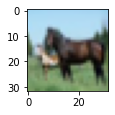

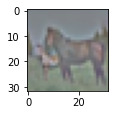

In [0]:
plotImage(X_train[12, :])
plotImage(X_train_ZCA_rescaled[12, :])

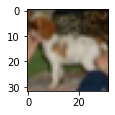

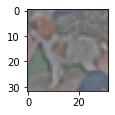

In [0]:
plotImage(X_test[12, :])
plotImage(X_test_ZCA_rescaled[12, :])

In [0]:
#one hot encoding
y_train = keras.utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)

In [0]:
y_train.shape

(50000, 10)